In [ ]:
# Importing libraries

In [289]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
%matplotlib inline

In [290]:
# Reading train data, adding labels

In [413]:
wage_df = pd.read_csv('data/adult.data', names = [ "age", "workclass", "weight", "education", "educationnum", "maritalstatus",
                                                 "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek",
                                                 "nativecountry", "salary"])

columns = [ "age", "workclass", "weight", "education", "educationnum", "maritalstatus",
                                                 "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek",
                                                 "nativecountry", "salary"]

wage_df['id'] = [random.randint(0,len(wage_df)) for x in range(wage_df.shape[0])]
wage_df.set_index('id', inplace=True)


wage_df["workclass"] = wage_df["workclass"].map(str.strip)

wage_df["education"] = wage_df["education"].map(str.strip)

wage_df["maritalstatus"] = wage_df["maritalstatus"].map(str.strip)
wage_df["occupation"] = wage_df["occupation"].map(str.strip)
wage_df["relationship"] = wage_df["relationship"].map(str.strip)
wage_df["race"] = wage_df["race"].map(str.strip)
wage_df["sex"] = wage_df["sex"].map(str.strip)


wage_df["nativecountry"] = wage_df["nativecountry"].map(str.strip)
wage_df["salary"] = wage_df["salary"].map(str.strip)
wage_df.sample(4)



,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
id,,,,,,,,,,,,,,,
26403,28,Local-gov,220754,HS-grad,9,Separated,Transport-moving,Own-child,White,Female,0,0,25,United-States,<=50K
7306,37,Private,175130,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,<=50K
6033,39,Private,184801,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
3095,35,Private,385847,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [414]:
obj_df = wage_df.select_dtypes(include=['object']).copy()
obj_df.head()
obj_df[obj_df.isnull().any(axis=1)]
obj_df["nativecountry"].value_counts()
cleanup_nums = {"workclass":     {"?": 0, "Private": 1, "Self-emp-not-inc" : 2, "Local-gov" : 3, "State-gov" : 4,
                                 "Self-emp-inc" : 5, "Federal-gov" : 6, "Without-pay": 7 , "Never-worked" :8},
                "maritalstatus": {"?": 0, "Married-civ-spouse": 1, "Never-married" : 2, "Divorced" : 3, "Separated" : 4,
                                 "Widowed" : 5, "Married-spouse-absent" : 6, "Married-AF-spouse": 7 
                                 },
               
               "occupation": {"?": 0, "Prof-specialty": 1, "Craft-repair" : 2, "Exec-managerial" : 3, "Adm-clerical" : 4,
                                 "Sales" : 5, "Other-service" : 6, "Machine-op-inspct": 7 , "Transport-moving" :8 ,
                                 "Handlers-cleaners": 9, "Farming-fishing": 10, "Tech-support" : 11, "Protective-serv" : 13, 
                              "Priv-house-serv" : 14, "Armed-Forces" : 15 },
               "race" : {"White" : 1, "Black" :2, "Asian-Pac-Islander" : 3, "Amer-Indian-Eskimo":4, "Other":5},
                "sex" : {"Male" :1, "Female":2},
                "nativecountry":     {"?": 0, "United-States": 1, "Mexico" : 2, "Philippines" : 3, "Germany" : 4,
                                 "Canada" : 5, "Puerto-Rico" : 6, "El-Salvador": 7 , "India" :8,
                                    "Cuba": 9, "England": 10, "Jamaica" : 11, "South" : 13, 
                              "China" : 14, "Italy" : 15, "Dominican-Republic" :16, "Vietnam" : 17, "Guatemala" : 18,
                                 "Japan": 12, "Poland" : 19,"Columbia" : 20, 
                                      "Taiwan":                           51,
 "Haiti":                            44,
 "Iran":                             43,
 "Portugal":                         37,
 "Nicaragua":                        34,
 "Peru":                             31,
 "France":                           29,
 "Greece":                           29,
 "Ecuador":                          28,
 "Ireland":                          24,
 "Hong":                             20,
 "Cambodia":                         19,
 "Trinadad&Tobago":                  19,
 "Thailand":                         18,
 "Laos":                             18,
 "Yugoslavia":                       16,
 "Outlying-US(Guam-USVI-etc)":       14,
 "Hungary":                          13,
 "Honduras":                         13,
 "Scotland":                         12,
 "Holand-Netherlands":                1
                                     },
                "salary": {">50K" : 1, "<=50K" :2}
                
               }




In [415]:
wage_df.replace(cleanup_nums, inplace=True)
wage_df.head()


,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
id,,,,,,,,,,,,,,,
10733,39,4,77516,Bachelors,13,2,4,Not-in-family,1,1,2174,0,40,1,2
10639,50,2,83311,Bachelors,13,1,3,Husband,1,1,0,0,13,1,2
11131,38,1,215646,HS-grad,9,3,9,Not-in-family,1,1,0,0,40,1,2
31937,53,1,234721,11th,7,1,9,Husband,2,1,0,0,40,1,2
24164,28,1,338409,Bachelors,13,1,1,Wife,2,2,0,0,40,9,2


In [361]:
# Reading test data, removing row 1, adding labels

In [362]:
wage_test_df = pd.read_csv('data/adult.test', skiprows=1, names = ["age", "workclass", "weight", "education", "educationnum", "maritalstatus",
                                                 "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek",
                                                 "nativecountry", "salary"])
wage_test_df.head(4)

,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.


In [363]:
wage_df.count() #count of dataset

age              32561
workclass        32561
weight           32561
education        32561
educationnum     32561
maritalstatus    32561
occupation       32561
relationship     32561
race             32561
sex              32561
capitalgain      32561
capitalloss      32561
hoursperweek     32561
nativecountry    32561
salary           32561
dtype: int64

In [364]:
wage_df.memory_usage() 

Index            260488
age              260488
workclass        260488
weight           260488
education        260488
educationnum     260488
maritalstatus    260488
occupation       260488
relationship     260488
race             260488
sex              260488
capitalgain      260488
capitalloss      260488
hoursperweek     260488
nativecountry    260488
salary           260488
dtype: int64

In [365]:
wage_test_df.count()
wage_test_df.memory_usage() 

Index                80
age              130248
workclass        130248
weight           130248
education        130248
educationnum     130248
maritalstatus    130248
occupation       130248
relationship     130248
race             130248
sex              130248
capitalgain      130248
capitalloss      130248
hoursperweek     130248
nativecountry    130248
salary           130248
dtype: int64

In [366]:
wage_df.groupby('workclass').count() # 1836 ? values 6%
wage_df.groupby('occupation').count() # 1843 ? values
wage_df.groupby('nativecountry').count() #583
wage_df.groupby('salary').count() # 24% > and 76% <

,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
salary,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841


In [367]:
wage_test_df.groupby('workclass').count() # 963 ?
wage_test_df.groupby('occupation').count() # 966 ?
wage_test_df.groupby('nativecountry').count() #274
wage_test_df.groupby('salary').count() # 24% > and 76% <

,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
salary,,,,,,,,,,,,,,
<=50K.,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
>50K.,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846


In [420]:
# Delete ? and transform variables

wage_df.head(4)

,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
id,,,,,,,,,,,,,,,
10733,39,4,77516,Bachelors,13,2,4,Not-in-family,1,1,2174,0,40,1,2
10639,50,2,83311,Bachelors,13,1,3,Husband,1,1,0,0,13,1,2
11131,38,1,215646,HS-grad,9,3,9,Not-in-family,1,1,0,0,40,1,2
31937,53,1,234721,11th,7,1,9,Husband,2,1,0,0,40,1,2


Figure 1.1


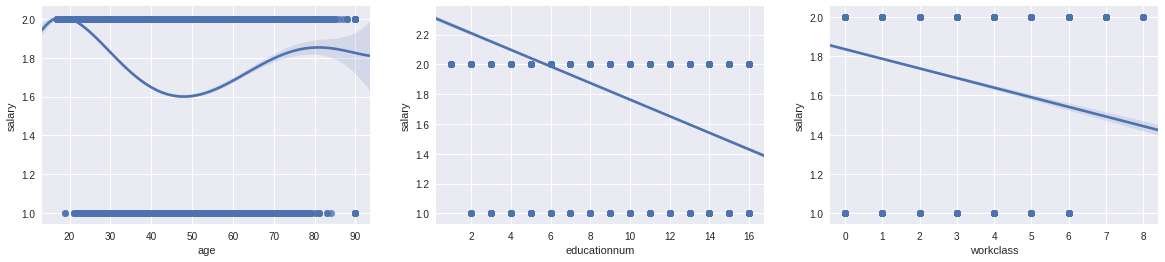

In [432]:
#Identify the features and the target 
# The target is the Salary variable - independent variable
#Chi Square

#Distribution plots of a few key features

fig = plt.figure(figsize=(20,4))

fig.add_subplot(131)
sns.regplot(x='age', y='salary', data=wage_df, order=5)

fig.add_subplot(132)
sns.regplot(x='educationnum', y='salary', data=wage_df)

fig.add_subplot(133)
sns.regplot(x='workclass', y='salary', data=wage_df)

print("Figure 1.1")


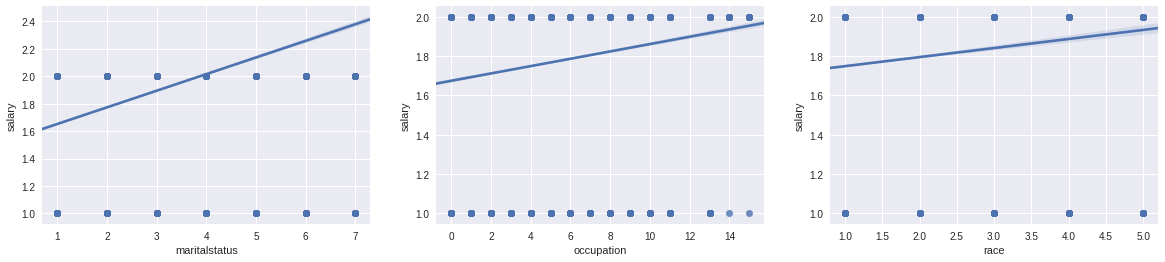

In [431]:
fig1 = plt.figure(figsize=(20,4))

fig1.add_subplot(131)
sns.regplot(x='maritalstatus', y='salary', data=wage_df)

fig1.add_subplot(132)
sns.regplot(x='occupation', y='salary', data=wage_df)

fig1.add_subplot(133)
sns.regplot(x='race', y='salary', data=wage_df)



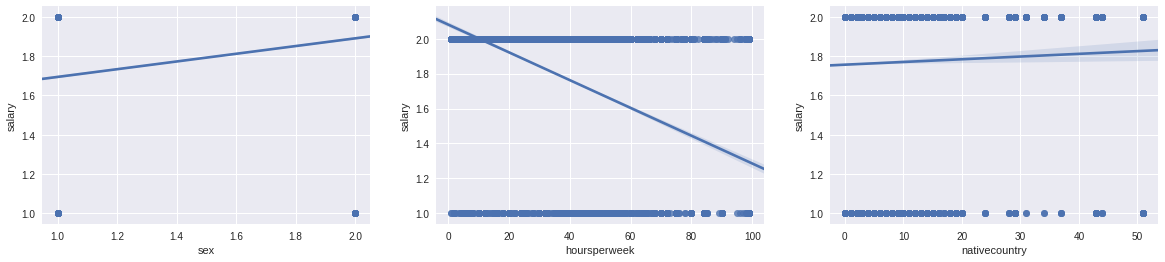

In [437]:
fig2 = plt.figure(figsize=(20,4))

fig2.add_subplot(131)
sns.regplot(x='sex', y='salary', data=wage_df)

fig2.add_subplot(132)
sns.regplot(x='hoursperweek', y='salary', data=wage_df)

fig2.add_subplot(133)
sns.regplot(x='nativecountry', y='salary', data=wage_df)

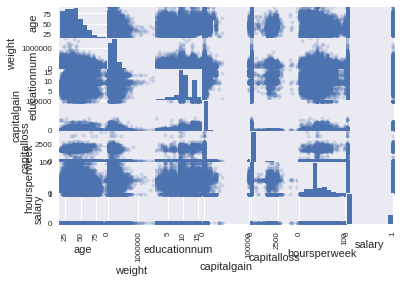

In [380]:
axes = pd.tools.plotting.scatter_matrix(wage_df, alpha=0.2)
fig = plt.figure(num=None, figsize=(6,3), dpi=100, facecolor='w', edgecolor='k')
fig.set_size_inches(18.5, 10.5, forward = True)
plt.savefig('scatter_matrix.png')

In [438]:
wage_df.describe()

,age,workclass,weight,educationnum,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.558398,1.897784e+05,10.080679,1.885845,4.531863,1.221707,1.330795,1077.648844,87.303830,40.437456,1.914990,1.759190
std,13.640433,1.322890,1.055500e+05,2.572720,1.098562,3.147008,0.627348,0.470506,7385.292085,402.960219,12.347429,4.523922,0.427581
min,17.000000,0.000000,1.228500e+04,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,1.000000,1.178270e+05,9.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,2.000000
50%,37.000000,1.000000,1.783560e+05,10.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,2.000000
75%,48.000000,1.000000,2.370510e+05,12.000000,2.000000,6.000000,1.000000,2.000000,0.000000,0.000000,45.000000,1.000000,2.000000
max,90.000000,8.000000,1.484705e+06,16.000000,7.000000,15.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,51.000000,2.000000
